---------------------------------------------------------------------------
Which C's will converge, C's are the starting 8.
The value C = -4 Diverges
The value C = -2.001 Diverges
the value C = -2 Converges
the value C = -1.999 Converges
the value C = -1 Converges
the value C = 0 Converges
The value C = 0.5 Diverges
The value C = 1 Diverges
The value C = 2 Diverges


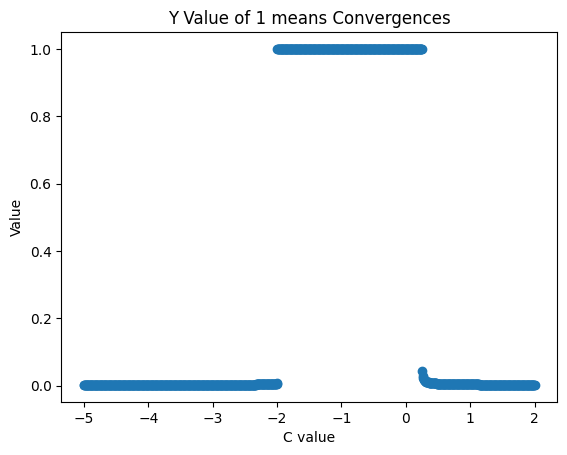

------------------------------------------------------------------------------------
Now lets see the convergent with C being a complex number, use the 8 initial values given.
the value C = (-0.4+0.2j) Converges
The value C = (0.4+0.6j) Diverges
the value C = (-1.7+0j) Converges
The value C = (-1.7+0.001j) Diverges
the value C = (-1.778+0j) Converges
the value C = (-1.778+0.001j) Converges
the value C = (-1.25+0j) Converges
The value C = (-1.25+0.04j) Diverges
The value C = (-0.125-0.9j) Diverges
the value C = (-0.125-0.85j) Converges
------------------------------------------------------------------------------------------
Lets see what happens when we plot the (nearly)converging Cs from the smoother complex number set


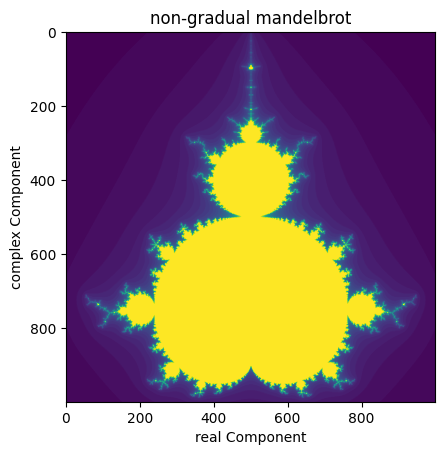

----------------------------------------
Now lets zoom in to (-.8, -.7) x (.05, .15) in the real and imaginary field respectively


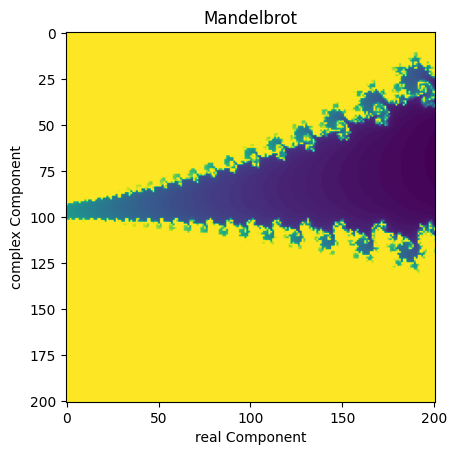

----------------------------------------
Now zoom in further, its a trip


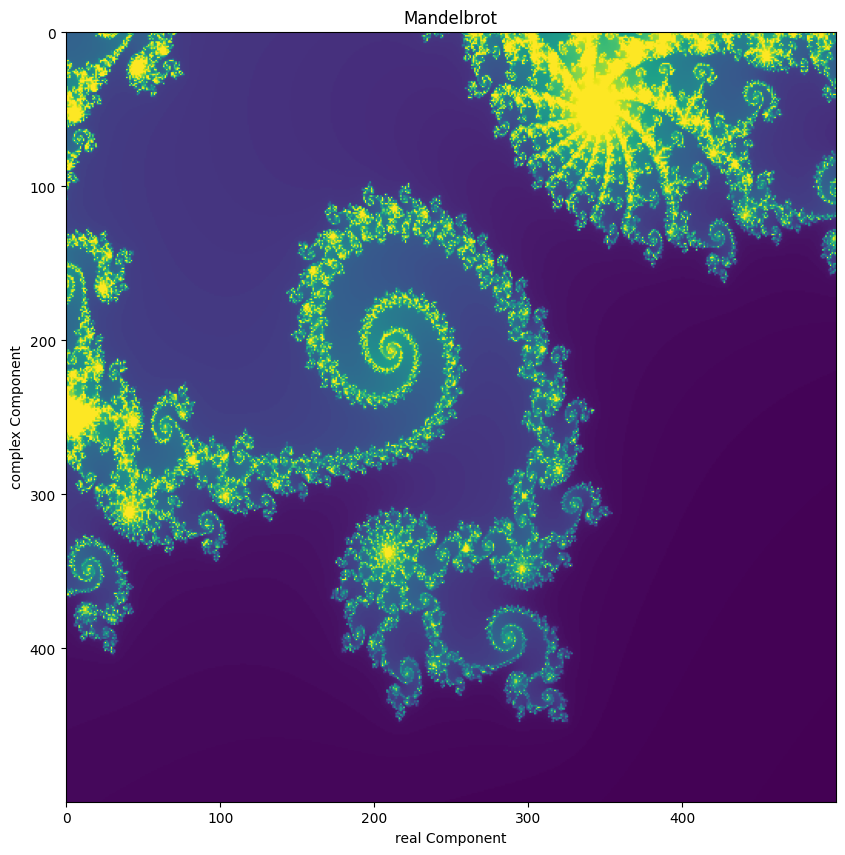

Zoom plus


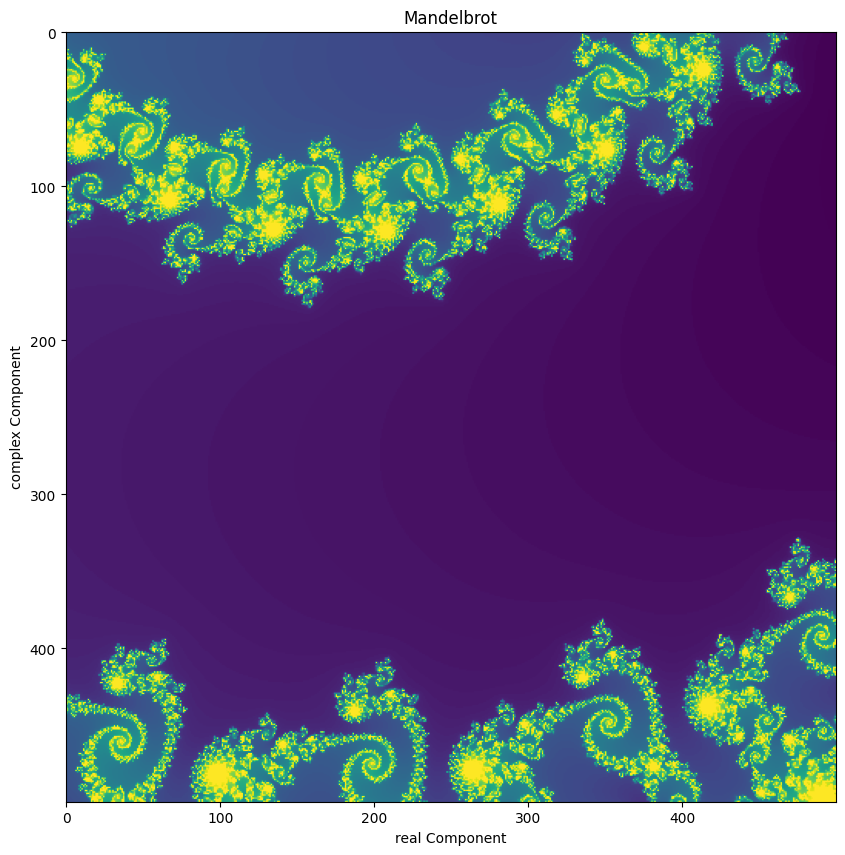

popout tab is one cool thing, commented out because it get annoying. uncomment if you want to see something cool.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(z, c):
    return z**2 + c
def isinmadelbrot(c, nmax = 1000, gradual = True):
    z=0
    for i in range(nmax):
        z = mandelbrot(z, c)
        if abs(z) > 50:
            if gradual == False:
                return 0
            else:
                return i/nmax
    return 1

ranges = np.linspace(-5, 2, 1000)
Cs = [-4, -2.001, -2, -1.999, -1, 0, .5, 1, 2]
print('---------------------------------------------------------------------------')
print("Which C's will converge, C's are the starting 8.")
for c in Cs:
    if isinmadelbrot(c) == 1:
        print('the value C =', c, 'Converges')
    else:
        print('The value C =', c, 'Diverges')
    
    test = []
for val in ranges:
    result = isinmadelbrot(val)
    test.append(result)
plt.scatter(ranges, test)
plt.title('Y Value of 1 means Convergences')
plt.xlabel('C value')
plt.ylabel('Value')
plt.show()

print('------------------------------------------------------------------------------------')
print('Now lets see the convergent with C being a complex number, use the 8 initial values given.')
Cs_complex = [complex(-.4, .2), complex(.4, .6), complex(-1.7, 0), complex(-1.7, .001), complex(-1.778, 0), complex(-1.778, .001), complex(-1.25, 0), complex(-1.25, .04), complex(-.125, -.9), complex(-.125, -.85)]
for C in Cs_complex:
    if isinmadelbrot(C) == 1:
        print('the value C =', C, 'Converges')
    else:
        print('The value C =', C, 'Diverges')

print('------------------------------------------------------------------------------------------')
print('Lets see what happens when we plot the (nearly)converging Cs from the smoother complex number set')
mandelbrot_imaginarys = np.zeros((1000,1000))
reals = np.linspace(-2, .5, 1000)
imaginaries = np.linspace(-1.25, 1.25, 1000)
for i, real in enumerate(reals):
    for j, imaginary in enumerate(imaginaries):
        mandelbrot_imaginarys[i, j] = isinmadelbrot(complex(real, imaginary), nmax=50)
plt.imshow(mandelbrot_imaginarys)
plt.title('non-gradual mandelbrot')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()


print('-'*40)
print('Now lets zoom in to (-.8, -.7) x (.05, .15) in the real and imaginary field respectively')

mandelbrot_imaginarys = np.zeros((201,201))
reals = np.linspace(-.8, -.7, 201)
imaginaries = np.linspace(.05, .15, 201)
for i, real in enumerate(reals):
    for j, imaginary in enumerate(imaginaries):
        mandelbrot_imaginarys[i, j] = isinmadelbrot(complex(real, imaginary), nmax=100)
plt.imshow(mandelbrot_imaginarys)
plt.title('Mandelbrot')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

print('-'*40)
print('Now zoom in further, its a trip')

mandelbrot_imaginarys = np.zeros((500,500))
reals = np.linspace(-.778, -.77, 500)
imaginaries = np.linspace(.12, .13, 500)
for i, real in enumerate(reals):
    for j, imaginary in enumerate(imaginaries):
        mandelbrot_imaginarys[i, j] = isinmadelbrot(complex(real, imaginary), nmax=200)
plt.figure(figsize = (10,10))
plt.imshow(mandelbrot_imaginarys)
plt.title('Mandelbrot')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

print('Zoom plus')

mandelbrot_imaginarys = np.zeros((500,500))
reals = np.linspace(-.77500, -.776, 500)
imaginaries = np.linspace(.124, .125, 500)
for i, real in enumerate(reals):
    for j, imaginary in enumerate(imaginaries):
        mandelbrot_imaginarys[i, j] = isinmadelbrot(complex(real, imaginary), nmax=200)
plt.figure(figsize = (10,10))
plt.imshow(mandelbrot_imaginarys)
plt.title('Mandelbrot')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

print('popout tab is one cool thing, commented out because it get annoying. uncomment if you want to see something cool.')
# %matplotlib qt

# A = np.matrix(mandelbrot_imaginarys)
# plt.rcParams['figure.figsize'] = [5,5]
# from matplotlib import cm
# min = A.min()
# A -= min
# max = A.max()
# while (True):
#     A = (A+2)%max
#     plt.imshow(A, cmap = 'gist_ncar', interpolation='nearest', animated = True)
#     plt.draw()
#     plt.pause(.1)


Now we will play around with the julia set which fixes the constant and varies the initial z0 to see which values do not diverge. Still complex!

In [240]:
fixed_C1 = complex(-.4, .6)
def isinjulia(c, z_0, nmax = 150, gradual = True):
    z = mandelbrot(z_0, c)
    for i in range(nmax):
        z = mandelbrot(z, c)
        if abs(z) > 50:
            if gradual == False:
                return 0
            else:
                return i/nmax
    return 1
def initial_z(x, y):
    return complex(x, y)
julia = np.zeros((600, 600))
for i, x in enumerate(np.linspace(-1.4,1.4, 600)):
    for j, y in enumerate(np.linspace(-1.2,1.2, 600)):
        julia[j, i] = isinjulia(fixed_C1, complex(x, y))


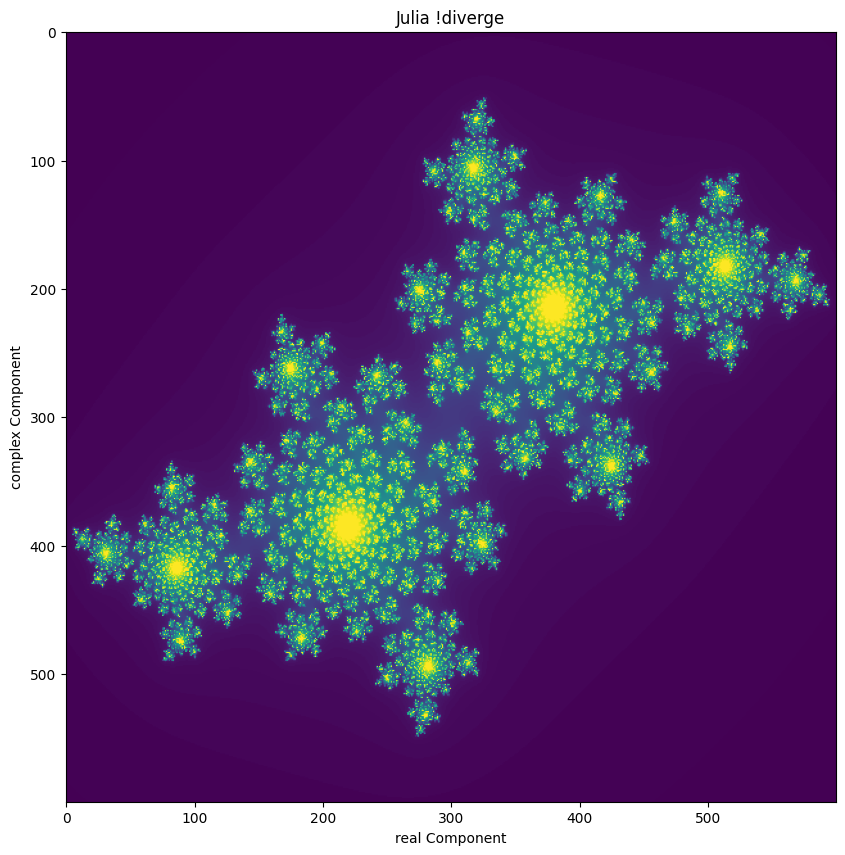

In [242]:
plt.figure(figsize = (10,10))
plt.imshow(julia)
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('fullJulia.png', julia)

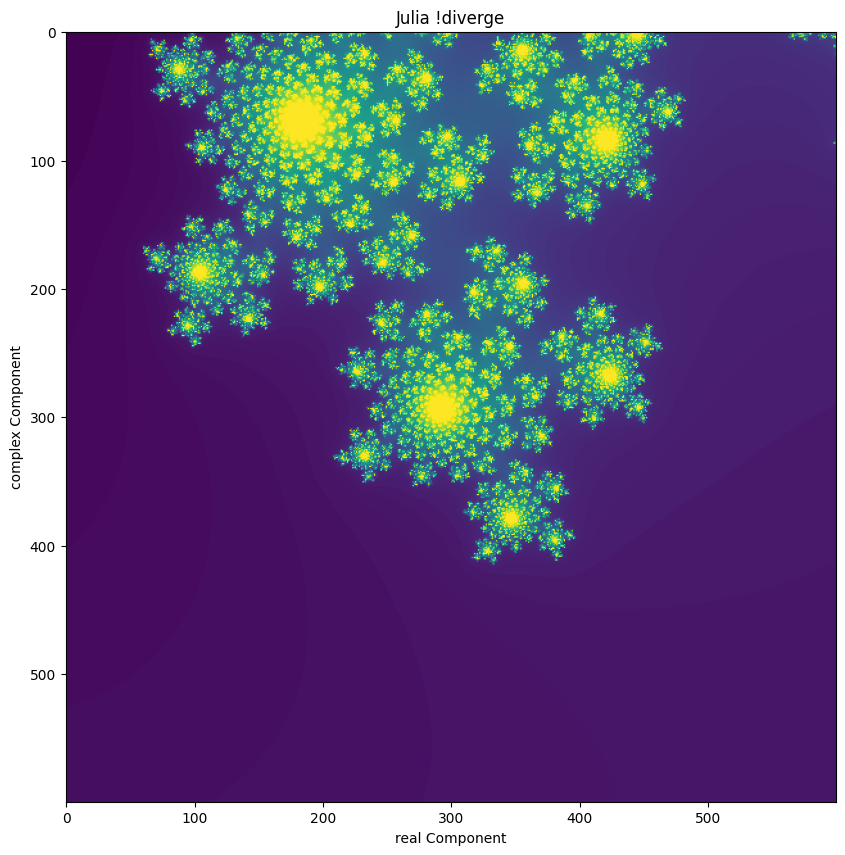

In [29]:
julia = np.zeros((600, 600))
for i, x in enumerate(np.linspace(-.1, 0, 600)):
    for j, y in enumerate(np.linspace(-.1, 0, 600)):
        julia[j, i] = isinjulia(fixed_C1, complex(x, y))
plt.figure(figsize = (10,10))
plt.imshow(julia)
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

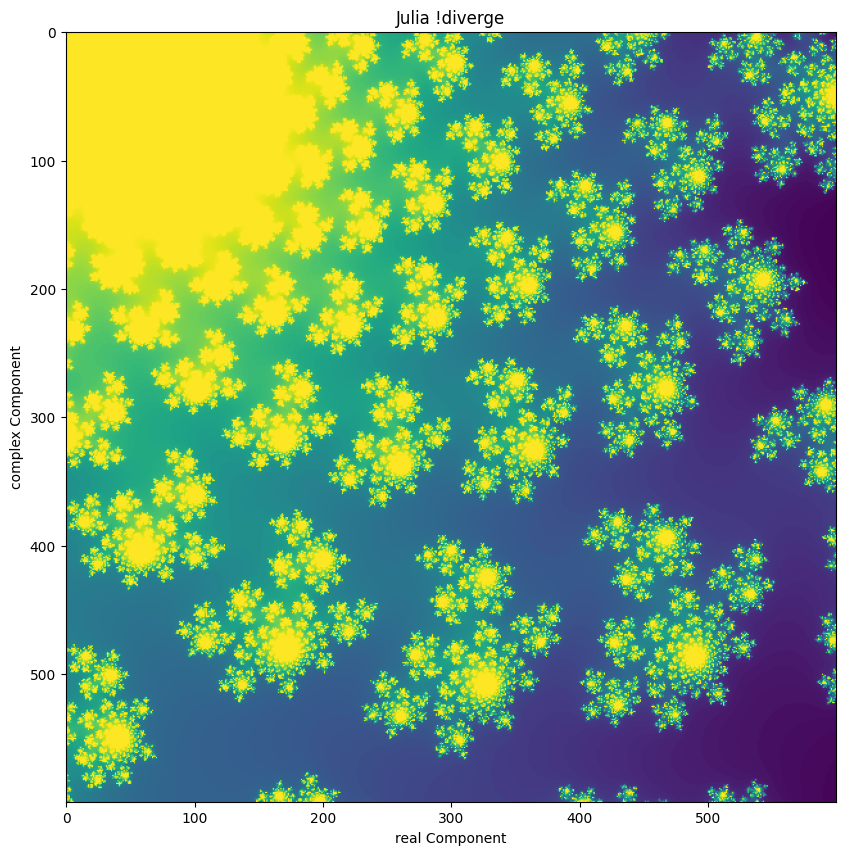

In [39]:
julia = np.zeros((600, 600))
for i, x in enumerate(np.linspace(-.05, -.06, 600)):
    for j, y in enumerate(np.linspace(-.05, -.06, 600)):
        julia[j, i] = isinjulia(fixed_C1, complex(x, y))
plt.figure(figsize = (10,10))
plt.imshow(julia)
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

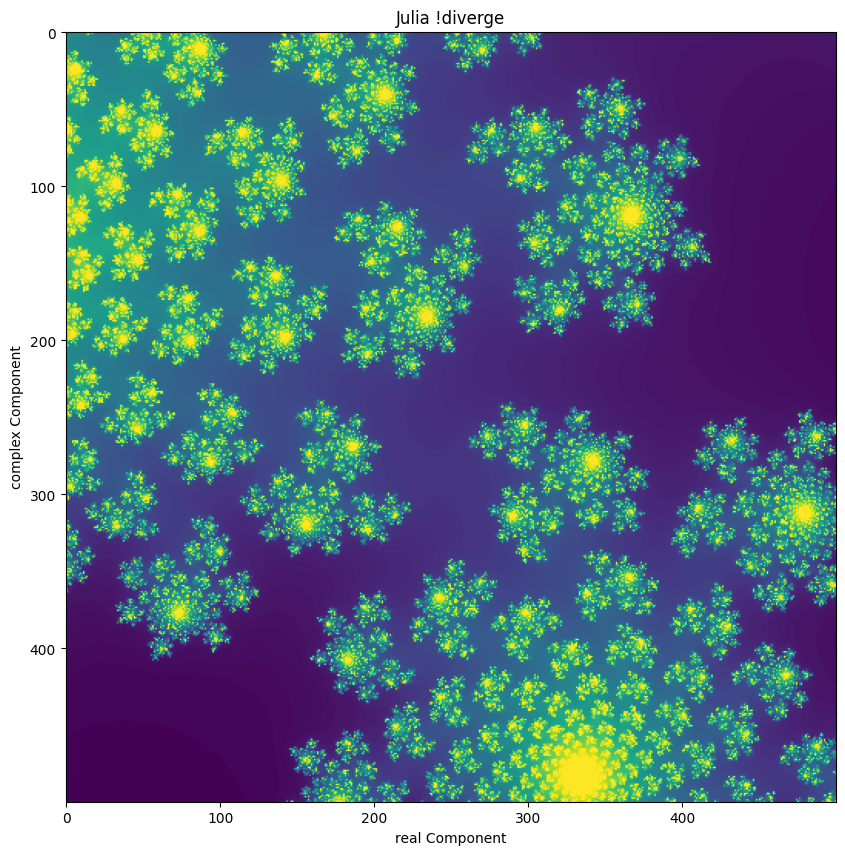

In [90]:
julia = np.zeros((500, 500))
for i, x in enumerate(np.linspace(-.05549, -.05551, 500)):
    for j, y in enumerate(np.linspace(-.05554, -.05556, 500)):
        julia[j, i] = isinjulia(fixed_C1, complex(x, y), nmax=250)
plt.figure(figsize = (10,10))
plt.imshow(julia)
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

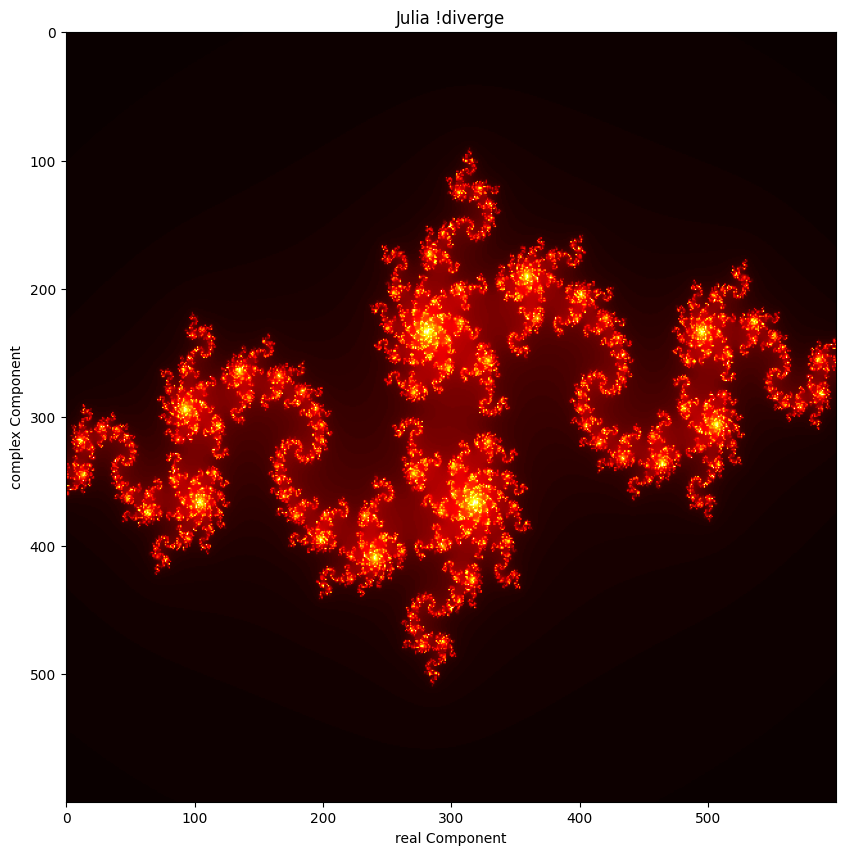

In [243]:
julia = np.zeros((600, 600))
fixed_C2 = complex(-.85, .22)
for i, x in enumerate(np.linspace(-1.4,1.4, 600)):
    for j, y in enumerate(np.linspace(-1.2,1.2, 600)):
        julia[j, i] = isinjulia(fixed_C2, complex(x, y))
plt.figure(figsize = (10,10))
plt.imshow(julia, cmap='hot')
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('NewCoolJulia.png', julia)

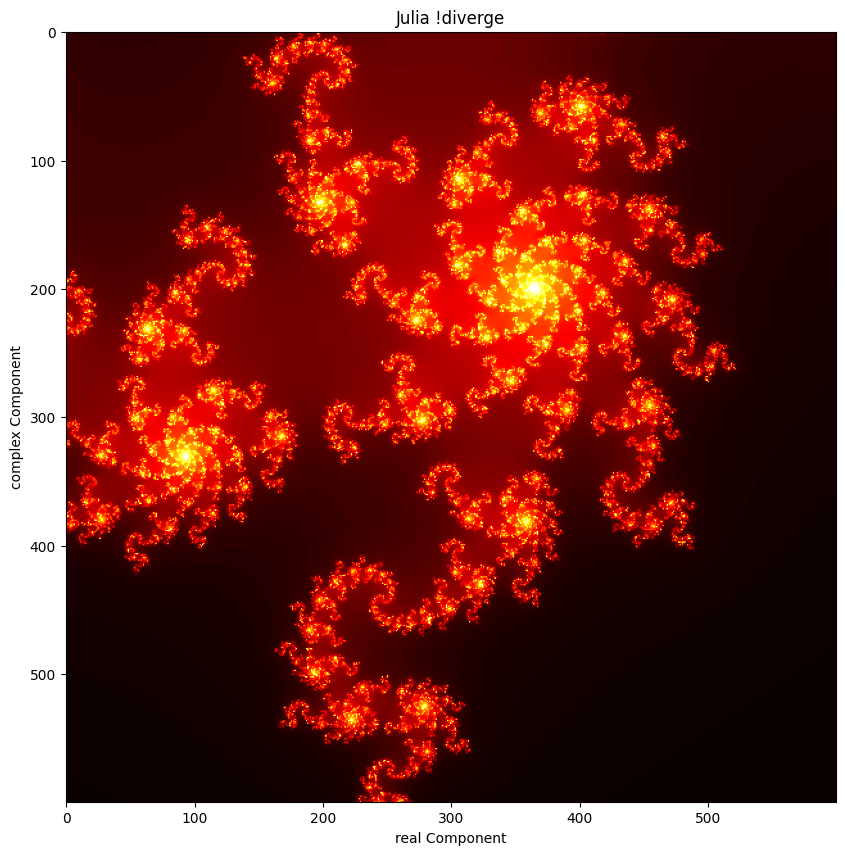

In [93]:
julia = np.zeros((600, 600))
fixed_C2 = complex(-.85, .22)
for i, x in enumerate(np.linspace(-.4,.4, 600)):
    for j, y in enumerate(np.linspace(0,.8, 600)):
        julia[j, i] = isinjulia(fixed_C2, complex(x, y))
plt.figure(figsize = (10,10))
plt.imshow(julia, cmap='hot')
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()


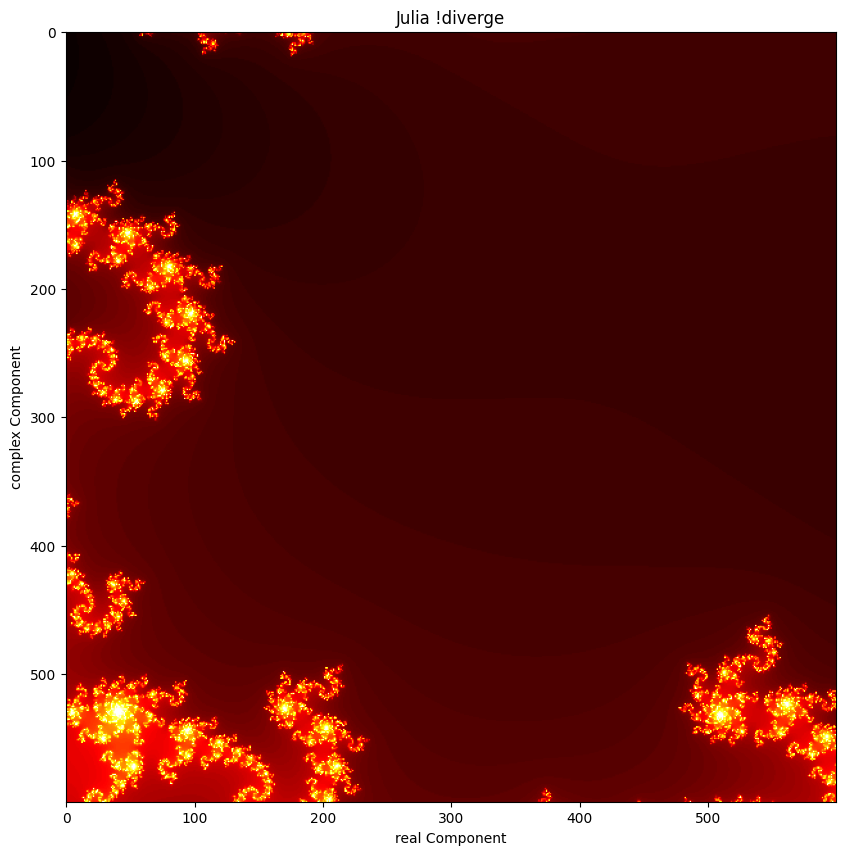

In [244]:
julia = np.zeros((600, 600))
fixed_C2 = complex(-.85, .22)
for i, x in enumerate(np.linspace(0.018, .019, 600)):
    for j, y in enumerate(np.linspace(0.575, .576, 600)):
        julia[j, i] = isinjulia(fixed_C2, complex(x, y), nmax=175)
plt.figure(figsize = (10,10))
plt.imshow(julia, cmap='hot')
plt.title('Julia !diverge')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('Coolest Julia.jpg', julia)

In [ ]:
# %matplotlib qt

# A = np.matrix(julia)
# plt.rcParams['figure.figsize'] = [5,5]
# from matplotlib import cm
# min = A.min()
# A -= min
# max = A.max()
# while (True):
#     A = (A+2)%max
#     plt.imshow(A, cmap = 'gist_ncar', interpolation='nearest', animated = True)
#     plt.draw()
#     plt.pause(.1)

Pt. 2 - Newton Fractals


2. There are 3 roots as it is a theorem in algebra that any real or complex valued polynomial of degree n has n distinct complex roots

In [222]:
#Used for plotting the function in the real plane. Core
def newton(fxn, deriv, z):
    return z - fxn(z)/deriv(z)
def fxn1(z):
    return np.power(z, 3) + 1
def deriv1(z):
    return 3*np.power(z, 2)

#Used to determine how fast each initial z locates its zero.
def isinnewton(z, nmax = 1000, gradual = True):
    while abs(fxn1(z)) > 10**(-3):
        z = newton(fxn=fxn1, deriv=deriv1, z = z)
    return z
def newton_mover(z, fxn, deriv, nmax = 1000, gradual = True):
    i = 0
    while abs(fxn(z)) > 10**(-3):
        z = newton(fxn=fxn, deriv=deriv, z = z)
        i += 1
    return z, i


#Now for number 3, raising z to a higher power
def fxn2(z):
    return np.power(z, 4) + 1
def deriv2(z):
    return 4*np.power(z, 3)
def fxn3(z):
    return np.power(z, 5) + 1
def deriv3(z):
    return 5*np.power(z, 4)
def fxn4(z):
    return np.power(z, 6) + 1
def deriv4(z):
    return 6*np.power(z, 5)



Text(0, 0.5, 'f(x)')

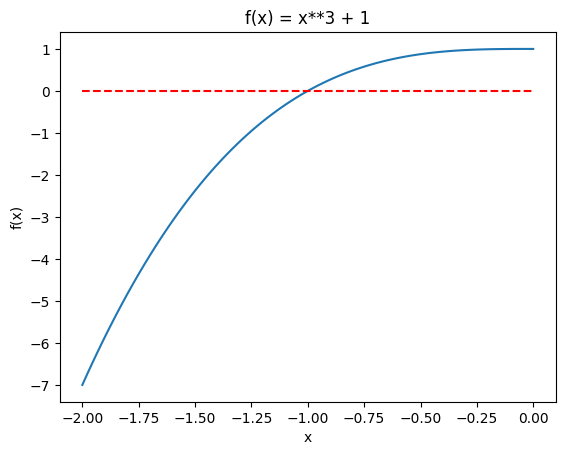

In [130]:
x = np.linspace(-2, 0, 100)
ys = fxn1(x)
plt.plot(x, ys)
plt.plot(x, np.zeros(100), 'r--')
plt.title('f(x) = x**3 + 1')
plt.xlabel('x')
plt.ylabel('f(x)')

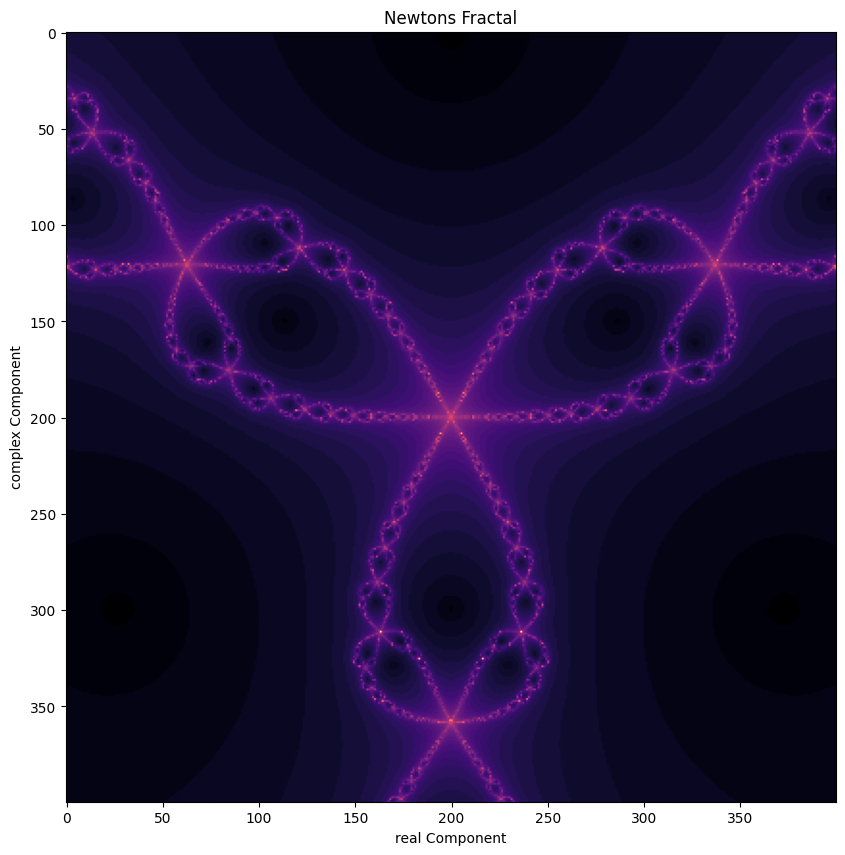

In [211]:
newtons = np.zeros((400, 400))
for i, x in enumerate(np.linspace(-1, 1, 400)):
    for j, y in enumerate(np.linspace(-1, 1, 400)):
        z = complex(x,y)
        z, c = newton_mover(z = z, fxn = fxn1, deriv = deriv1)
        newtons[i, j] = c

plt.figure(figsize = (10,10))
plt.imshow(newtons, cmap='magma')
plt.title('Newtons Fractal')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

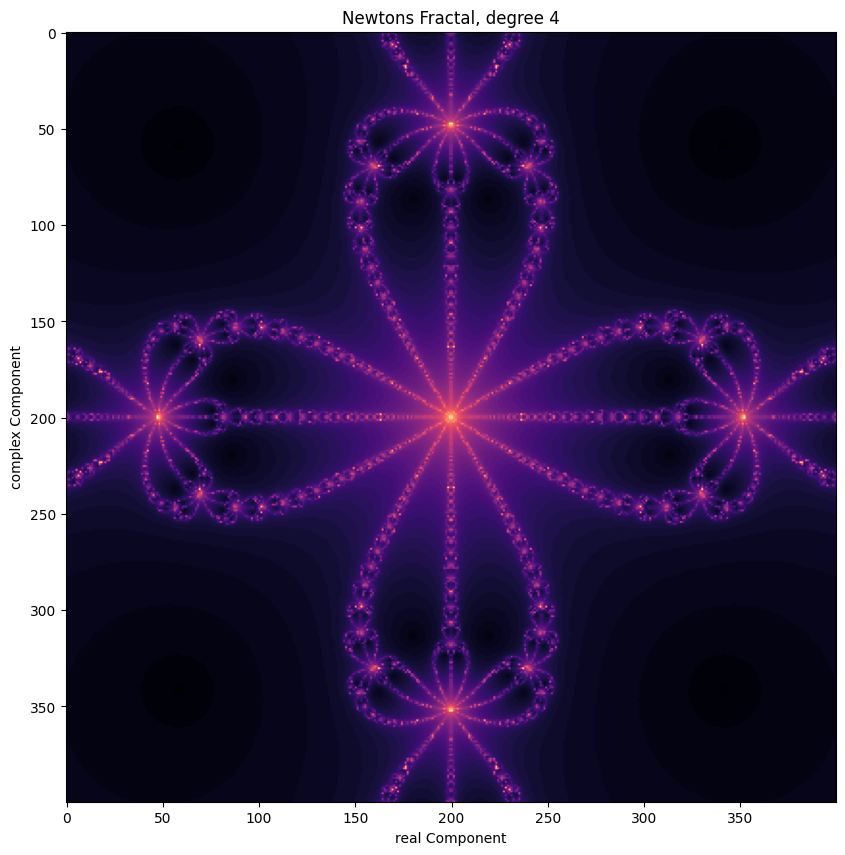

In [245]:
#Number 3 work, degree 4
newtons2 = np.zeros((400, 400))
for i, x in enumerate(np.linspace(-1, 1, 400)):
    for j, y in enumerate(np.linspace(-1, 1, 400)):
        z = complex(x,y)
        z, c = newton_mover(z = z, fxn=fxn2, deriv= deriv2)
        newtons2[i, j] = c

plt.figure(figsize = (10,10))
plt.imshow(newtons2, cmap='magma')
plt.title('Newtons Fractal, degree 4')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('Newton4.png', newtons2)

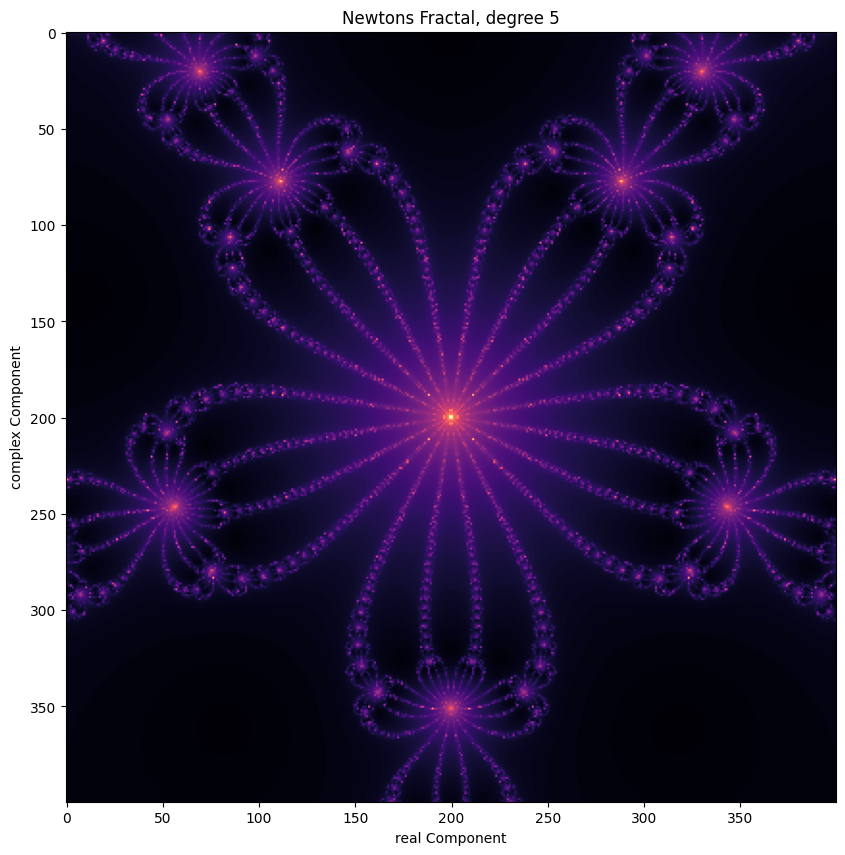

In [246]:
#Number 3 work, degree 5
newtons3 = np.zeros((400, 400))
for i, x in enumerate(np.linspace(-1, 1, 400)):
    for j, y in enumerate(np.linspace(-1, 1, 400)):
        z = complex(x,y)
        z, c = newton_mover(z = z, fxn=fxn3, deriv= deriv3)
        newtons3[i, j] = c

plt.figure(figsize = (10,10))
plt.imshow(newtons3, cmap='magma')
plt.title('Newtons Fractal, degree 5')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('Newton5.png', newtons3)

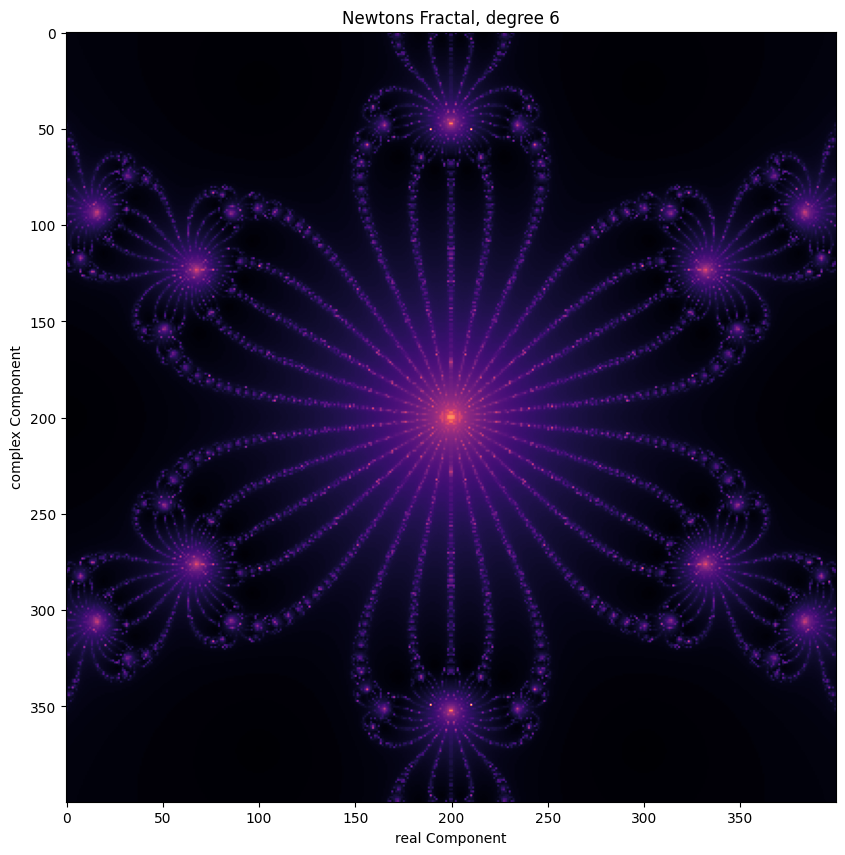

In [247]:
#Number 3 work, degree 5
newtons4 = np.zeros((400, 400))
for i, x in enumerate(np.linspace(-1, 1, 400)):
    for j, y in enumerate(np.linspace(-1, 1, 400)):
        z = complex(x,y)
        z, c = newton_mover(z = z, fxn=fxn4, deriv= deriv4)
        newtons4[i, j] = c

plt.figure(figsize = (10,10))
plt.imshow(newtons4, cmap='magma')
plt.title('Newtons Fractal, degree 6')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('Newton6.png', newtons4)

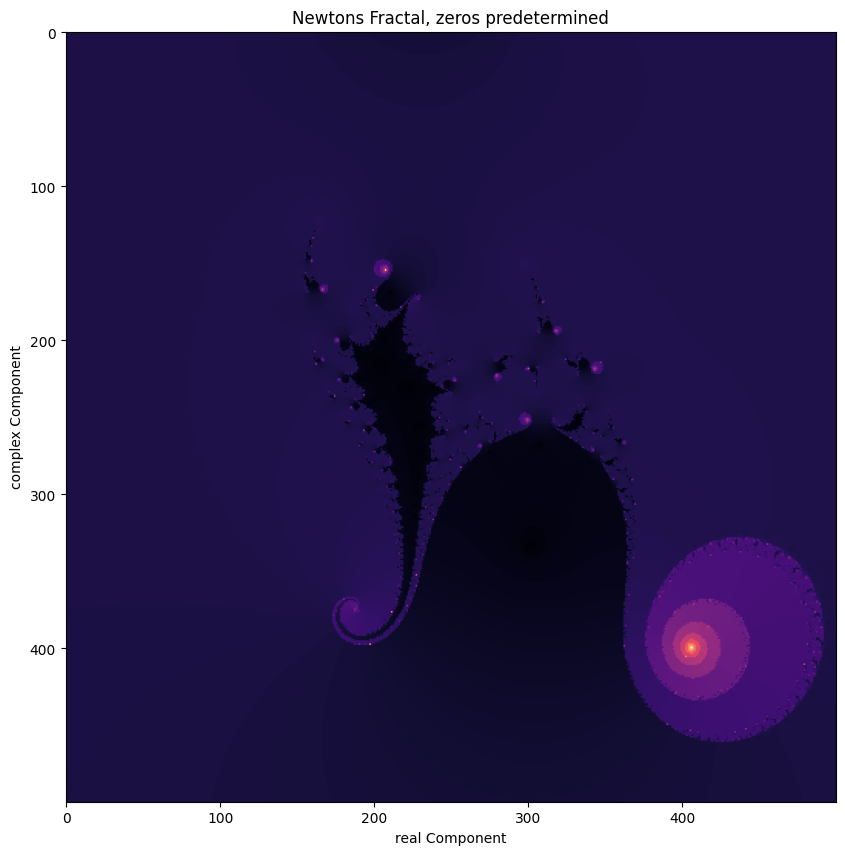

In [248]:

#Number 4
def fxnzeros(z, za, zb, zc, zd):
    return (z-za)*(z-zb)*(z-zc)*(z-zd)
def deriv_zeros(z, za, zb, zc, zd):
    deg3term = 4*z**3  
    deg2term = 3*(za+zb+zc+zd)*z**2
    deg1term = 2*z*(za*zb+za*zc+za*zd+zb*zc+zb*zd+zc*zd)
    deg0term = za*zb*zc+za*zb*zd+za*zc*zd+zb*zc*zd
    return deg0term+deg1term+deg2term+deg3term

def newton_with_zeros(fxn, deriv, z, za,zb, zc,zd):
    return z - fxn(z,za,zb,zc,zd)/deriv(z,za,zb,zc,zd)

def newton_mover2(z, za, zb, zc, zd, fxn, deriv, nmax = 1000, gradual = True):
    i = 0
    while abs(fxn(z, za, zb, zc, zd)) > 10**(-3):
        z = z - fxn(z, za,zb,zc,zd)/deriv(z,za,zb,zc,zd)
        i += 1
    return z, i


za = complex(.9, .9)
zb = complex(.5, .24)
zc = complex(.75, -.5)
zd = complex(-.2, -.4)
newtonszeros = np.zeros((500, 500))
for i, x in enumerate(np.linspace(-1.5, 1.5, 500)):
    for j, y in enumerate(np.linspace(-1.7, 1.5, 500)):
        z = complex(x,y)
        z, c = newton_mover2(z = z, za = za,zb = zb,zc = zc,zd = zd, fxn=fxnzeros, deriv= deriv_zeros)
        newtonszeros[i, j] = c

plt.figure(figsize = (10,10))
plt.imshow(newtonszeros, cmap='magma')
plt.title('Newtons Fractal, zeros predetermined')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()
plt.imsave('Newtonzeros.png', newtonszeros)

C:\Users\Tyler Marino\AppData\Local\Temp\ipykernel_24596\3765806125.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  newtons[j, i] = isinnewton(z, fxn(z), deriv(z))


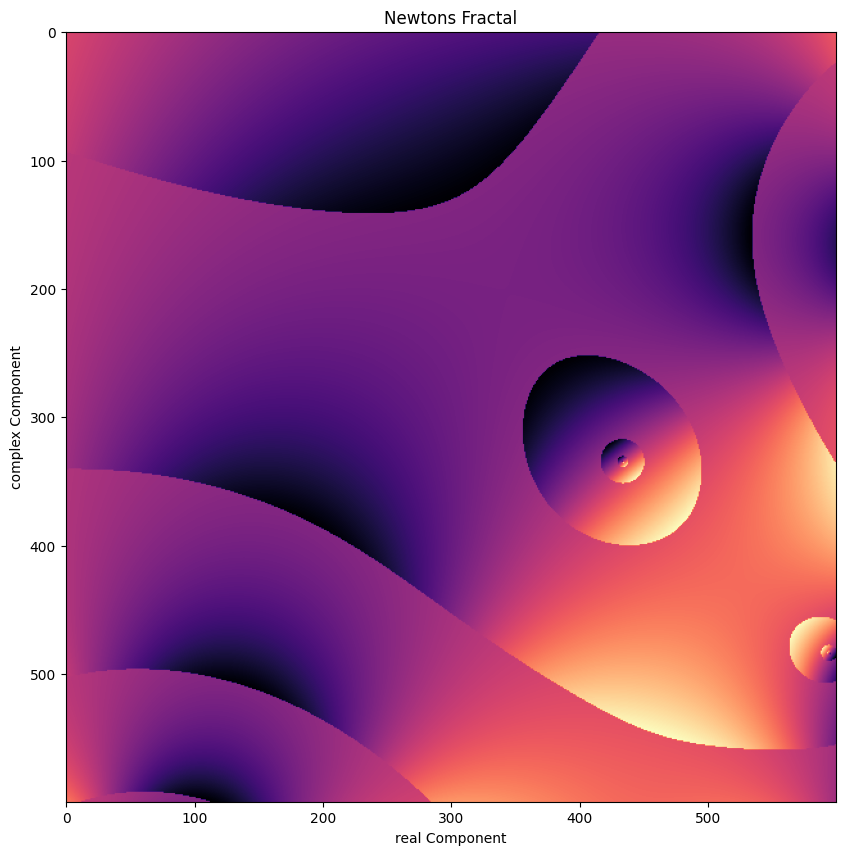

In [167]:
#Reshape the derivative to have a plus 1 term and it looks really cool
newtons = np.zeros((600, 600))
for i, x in enumerate(np.linspace(.15, .2, 600)):
    for j, y in enumerate(np.linspace(.45, .5, 600)):
        z = complex(x,y)
        newtons[j, i] = isinnewton(z, fxn1(z), deriv1(z))
plt.figure(figsize = (10,10))
plt.imshow(newtons, cmap = 'magma')
plt.title('Newtons Fractal')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()

C:\Users\Tyler Marino\AppData\Local\Temp\ipykernel_24596\183848759.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  newtons[j, i] = isinnewton(z, fxn(z), deriv(z))


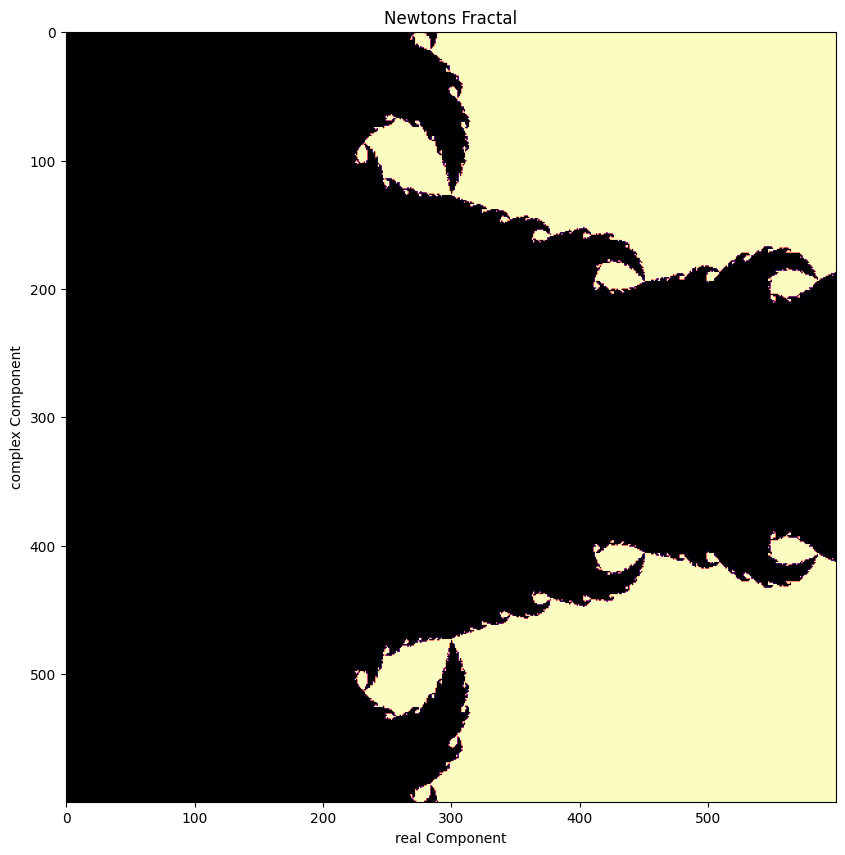

In [169]:
##Reshape the derivative to have a constant term and it will show a cool picture
newtons = np.zeros((600, 600))
for i, x in enumerate(np.linspace(-1, 1, 600)):
    for j, y in enumerate(np.linspace(-1, 1, 600)):
        z = complex(x,y)
        newtons[j, i] = isinnewton(z, fxn1(z), deriv1(z))
plt.figure(figsize = (10,10))
plt.imshow(newtons, cmap = 'magma')
plt.title('Newtons Fractal')
plt.xlabel('real Component')
plt.ylabel('complex Component')
plt.show()